In [17]:
import asammdf
from asammdf import MDF
import pandas as pd
import os
import numpy as np
import time
from ParseShiftData_v0 import *
import sys
import glob

In [18]:
APS = "HEV_AccelPdlVal"
eng_rpm = "HEV_EngSpdVal"
BPS = "IEB_StrkDpthPcVal"
tr_class = "LHTCU_ShftTrgtClsSta"
cur_gear = "HTCU_CurrGearSta"
target_gear = "HTCU_TrgtGearSta"
wheel_spd = "WHL_SpdFLVal"
accel = "YRS_LongAccelVal"
mot_spd = "NTU"  # tm_in_spd 와 같음
tm_out_spd = "NAB"
tm_delta_acc = "ntug_SyncFilt"
shift_phase = "esa_Phase"

signals = (APS, eng_rpm, BPS, tr_class, cur_gear, target_gear,
           wheel_spd, accel, mot_spd, tm_out_spd, tm_delta_acc, shift_phase)

In [22]:
dat_file = glob.glob("MDFs/*.dat*")

In [25]:
dat_file

['MDFs\\2021-07-13 10_53_15_NQ5_PHEV_P1_#011_12변속데이터.dat',
 'MDFs\\2021-07-14 13_41_29_NQ5_HEV_P1#522_sq_AI원리시험_01(양산수준).dat',
 'MDFs\\2021-07-14 14_47_24_NQ5_HEV_P1#522_sq_AI원리시험_03(악의모드).dat']

In [23]:
file_name, file_extension = os.path.splitext(dat_file[0])

In [24]:
input_mdf = MDF(dat_file[0])

In [13]:
signal_loc = get_group_idx(signals, input_mdf)

In [26]:
signal_loc["NTU"]

199

In [21]:
full_log, shift_time = get_data(signals, signal_loc, file_extension, input_mdf, tr_class, cur_gear, target_gear)

In [24]:
full_log.to_csv("log.csv")

In [23]:
shift_time

[[17.6607, 18.7004],
 [43.6011, 45.3009],
 [74.3419, 75.9614],
 [286.2554, 287.8552],
 [379.5671, 381.1768],
 [397.1476, 398.677],
 [411.0478, 412.6073],
 [421.708, 423.2175],
 [434.1082, 435.6479],
 [445.8083, 447.3379],
 [456.9385, 458.5283],
 [468.8487, 470.4483],
 [481.8889, 483.4385],
 [494.5092, 496.0288],
 [506.7493, 508.2792],
 [518.2896, 519.7592],
 [533.7898, 535.2795],
 [546.4701, 548.0196],
 [559.1502, 560.6599],
 [572.1305, 573.7401],
 [584.2107, 585.8102],
 [597.471, 599.0004],
 [610.831, 612.3508],
 [623.6913, 625.281],
 [637.1516, 638.6311],
 [664.2318, 665.7415],
 [676.9322, 678.5417],
 [690.5722, 692.092],
 [703.5124, 705.1221],
 [716.4528, 718.0724],
 [748.8332, 750.4629],
 [763.9335, 765.4632],
 [777.8937, 779.4235],
 [791.7139, 793.2537],
 [807.7343, 809.264],
 [822.6546, 824.1943],
 [837.7148, 839.2545],
 [853.155, 854.6947],
 [867.2751, 868.8047],
 [882.4955, 884.025],
 [895.1558, 896.7353],
 [908.7759, 910.2955],
 [922.9962, 924.5357],
 [957.6966, 959.2462],
 [9

In [88]:
shift_time

[[17.6607, 18.7004],
 [43.6011, 45.3009],
 [74.3419, 75.9614],
 [286.2554, 287.8552],
 [379.5671, 381.1768],
 [397.1476, 398.677],
 [411.0478, 412.6073],
 [421.708, 423.2175],
 [434.1082, 435.6479],
 [445.8083, 447.3379],
 [456.9385, 458.5283],
 [468.8487, 470.4483],
 [481.8889, 483.4385],
 [494.5092, 496.0288],
 [506.7493, 508.2792],
 [518.2896, 519.7592],
 [533.7898, 535.2795],
 [546.4701, 548.0196],
 [559.1502, 560.6599],
 [572.1305, 573.7401],
 [584.2107, 585.8102],
 [597.471, 599.0004],
 [610.831, 612.3508],
 [623.6913, 625.281],
 [637.1516, 638.6311],
 [664.2318, 665.7415],
 [676.9322, 678.5417],
 [690.5722, 692.092],
 [703.5124, 705.1221],
 [716.4528, 718.0724],
 [748.8332, 750.4629],
 [763.9335, 765.4632],
 [777.8937, 779.4235],
 [791.7139, 793.2537],
 [807.7343, 809.264],
 [822.6546, 824.1943],
 [837.7148, 839.2545],
 [853.155, 854.6947],
 [867.2751, 868.8047],
 [882.4955, 884.025],
 [895.1558, 896.7353],
 [908.7759, 910.2955],
 [922.9962, 924.5357],
 [957.6966, 959.2462],
 [9

In [28]:
df_ntu = input_mdf.get_group(signal_loc["NTU"])

In [46]:
df_engine_rpm = input_mdf.get_group(signal_loc["HEV_EngSpdVal"])

In [53]:
df_input_var = input_mdf.get_group(signal_loc["ntug_SyncFilt"])

In [55]:
df_input_var.columns

Index(['hdbt_SolAdp_4_[0]\XCP:3', 'hdb3_pv\XCP:3', 'fbr_strk\XCP:3',
       'esa_Phase\XCP:3', 'hdbt_SolAdp_1_EV_[0]\XCP:3',
       'hdb_Adp_Sum_App\XCP:3', 'hdbt_SolAdp_1_[0]\XCP:3',
       'htu_MomentCap\XCP:3', 'ntug\XCP:3', 'hdbt_SolAdp_2_EV_[0]\XCP:3',
       'NTU\XCP:3', 'hsy_Gap_CurDest\XCP:3', 'rsa_ChangeID\XCP:3',
       'MTU_Acor_Cmd\XCP:3', 'hdr5s\XCP:3', 'hdr4s\XCP:3',
       'zdbt_SolAdp_2_EV_[0]\XCP:3', 'MTU_Acor\XCP:3', 'hdb2_pv\XCP:3',
       'ntug_Sync\XCP:3', 'hdb_Adp_Sum_Rel\XCP:3', 'zdbt_SolAdp_3_[0]\XCP:3',
       'hdbt_SolAdp_2_[0]\XCP:3', 'nsy_Cur\XCP:3', 'hdb4_pv\XCP:3',
       'MTU\XCP:3', 'zdbt_SolAdp_1_[0]\XCP:3', 'mme_Inc_Out\XCP:3',
       'NMO\XCP:3', 'hdb_Cal_Sum_App\XCP:3', 'hdb_Cal_Sum_Rel\XCP:3',
       'hdbt_SolAdp_3_[0]\XCP:3', 'NAB\XCP:3', 'zdbt_SolAdp_1_EV_[0]\XCP:3',
       'HDK\XCP:3', 'hdr1s\XCP:3', 'nsy_Dest\XCP:3', 'CGT\XCP:3',
       'zdbt_SolAdp_4_[0]\XCP:3', 'FZGG_HADIFF_Calc\XCP:3', 'hdr2s\XCP:3',
       'hdb1_pv\XCP:3', 'zdbt_SolAdp_2_[0]

In [44]:
import matplotlib.pyplot as plt

In [81]:
window = 1

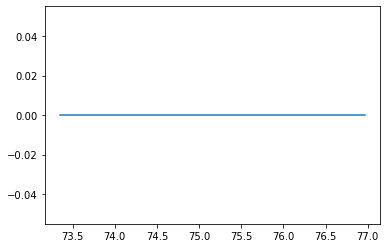

In [82]:
plt.plot(df_engine_rpm["HEV_EngSpdVal\CAN-Monitoring:1"].loc[(df_engine_rpm.index > shift_time[2][0]-window) & (df_engine_rpm.index < shift_time[2][1]+window)])

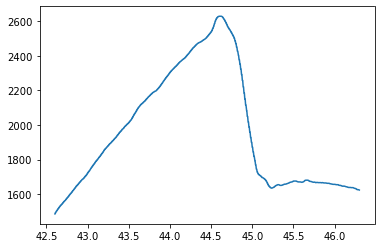

In [83]:
plt.plot(df_ntu['NTU\XCP:3'].loc[(df_ntu.index > shift_time[1][0]-window) & (df_ntu.index < shift_time[1][1]+window)])

In [91]:
plt.style.use('dark_background')

In [96]:
for i in range(len(shift_time)):
    
    plt.plot(df_input_var['ntug_SyncFilt\XCP:3'].loc[(df_ntu.index > shift_time[i][0]-window) & (df_input_var.index < shift_time[i][1]+window)], 
             linewidth = 3, color='white')
    plt.plot(df_ntu['NTU\XCP:3'].loc[(df_ntu.index > shift_time[i][0]-window) & (df_ntu.index < shift_time[i][1]+window)], 
             linewidth = 3, color='white')
    plt.plot(df_engine_rpm["HEV_EngSpdVal\CAN-Monitoring:1"].loc[(df_engine_rpm.index > shift_time[i][0]-window) & (df_engine_rpm.index < shift_time[i][1]+window)],
            linewidth = 3, color='white')
    
    plt.axis("off")
    plt.savefig("savefig/{}.png".format(i), bbox_inches="tight")
    plt.close()
    